In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
df = pd.read_csv('/Users/adamaskari/Downloads/amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [2]:
# 1.1
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_sorted = crosstab_result.sort_values(by=True, ascending=False)
crosstab_sorted

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [3]:
# 1.2.1

from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, expected_freq = chi2_contingency(crosstab_sorted)

chi2_statistic, chi2_p_value, expected_freq

(np.float64(36540.202700613874),
 np.float64(0.0),
 array([[9.53276775e+03, 3.12322504e+01],
        [9.53775142e+03, 3.12485785e+01],
        [1.50008526e+04, 4.91473619e+01],
        [8.33534088e+05, 2.73091153e+03],
        [8.63072312e+03, 2.82768775e+01],
        [1.92489346e+04, 6.30653723e+01],
        [9.40618248e+03, 3.08175185e+01],
        [9.51781673e+03, 3.11832664e+01],
        [1.77139637e+04, 5.80363399e+01],
        [1.73601230e+04, 5.68770500e+01],
        [6.14486754e+03, 2.01324575e+01],
        [9.53775142e+03, 3.12485785e+01],
        [8.54201376e+03, 2.79862386e+01],
        [7.85825397e+03, 2.57460333e+01],
        [8.10345063e+03, 2.65493722e+01],
        [9.14802827e+03, 2.99717267e+01],
        [7.27815455e+03, 2.38454509e+01],
        [8.50214439e+03, 2.78556144e+01],
        [9.35036536e+03, 3.06346446e+01],
        [1.80827554e+04, 5.92446139e+01],
        [9.35235882e+03, 3.06411758e+01],
        [1.17505018e+04, 3.84982225e+01],
        [8.85299489e+03, 

In [4]:
# 1.2.2
from scipy.stats.contingency import association

association(crosstab_sorted, method="cramer")

0.12228294397605641

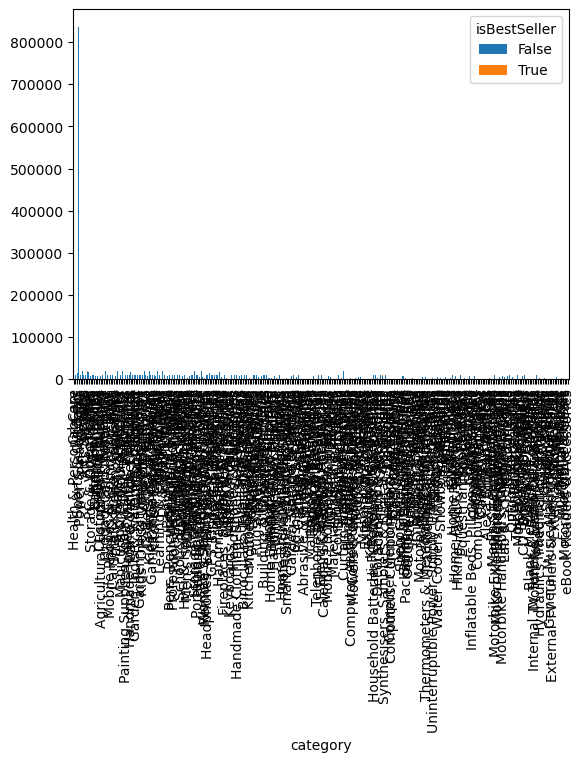

In [5]:
# 1.3
crosstab_sorted.plot(kind="bar", stacked=True);
plt.show()

In [ ]:
# 2.1
sns.violinplot(data=df, x='category', y='price', palette="coolwarm", hue='price', legend=True);
plt.show()

In [ ]:
# 2.2
top_10_categories = df['category'].value_counts().head(10).index

top_df = df[df['category'].isin(top_10_categories)]

avg_price_by_category = top_df.groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values)

plt.title('Average Price by Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2.3
sns.boxplot(data=df, x='stars', y='category', palette="coolwarm", hue='category', legend=False);
plt.show()

In [ ]:
# 3.1
correlation = df['price'].corr(df['stars'])
correlation

In [ ]:
# 3.2.1
sns.scatterplot(data=df, x='stars', y='price');
plt.show()

In [ ]:
# 3.2.2
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(18, 15))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for All Numerical Variables")
plt.show()

In [ ]:
# 3.2.3
import statsmodels.api as sm

sm.qqplot(df['price'], line='s');
plt.show()